# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/pengeluaran.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [5]:
row, col = df.shape
print(f"Jumlah kolom: {col}")
print(f"Jumlah baris: {row}")

Jumlah kolom: 5
Jumlah baris: 4620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [7]:
df.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [8]:
df.describe()

,tahun,peng
count,4620.000000,4.512000e+03
mean,2015.045455,6.012012e+05
std,4.416124,3.524052e+05
min,2007.000000,5.921600e+04
25%,2011.750000,3.476272e+05
50%,2015.000000,5.206945e+05
75%,2019.000000,7.577325e+05
max,2022.000000,2.525347e+06


<Figure size 1000x600 with 0 Axes>

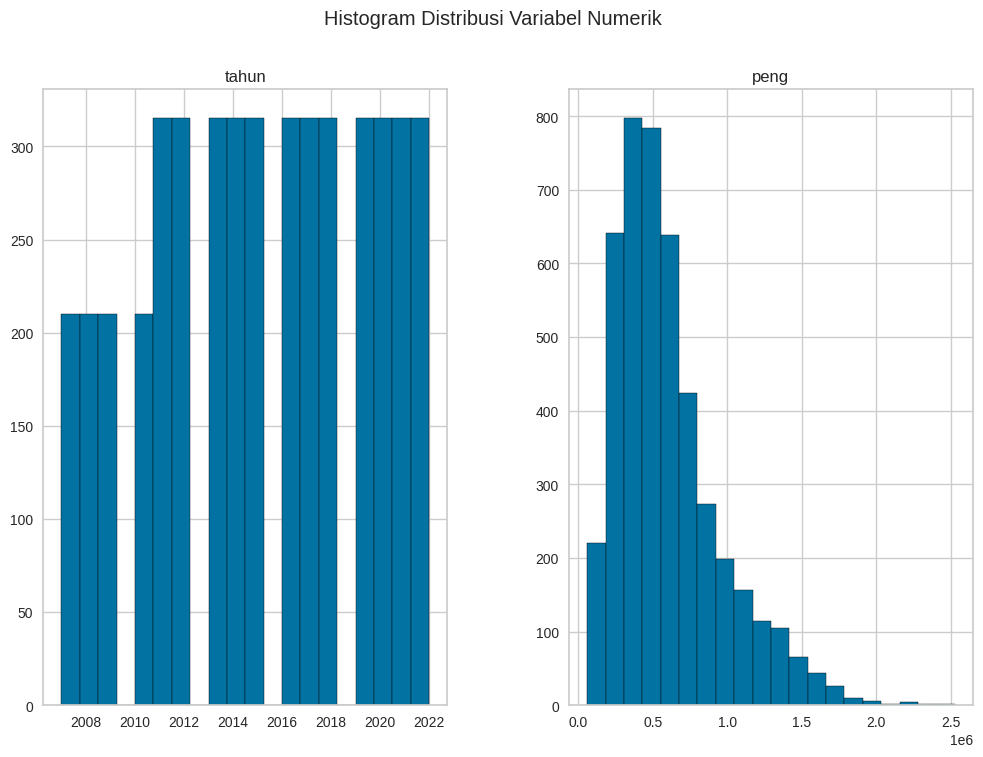

In [9]:
# Visualisasi histogram untuk distribusi variabel numerik
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

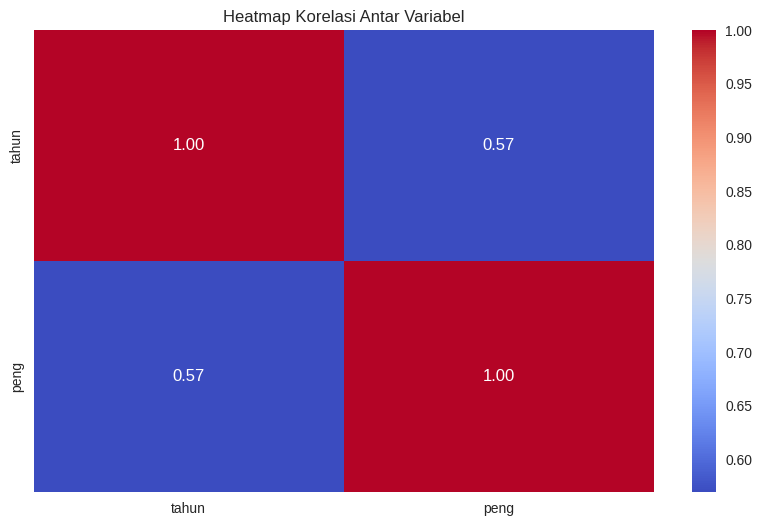

In [10]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
df_cleaned = df.copy()

## Menghapus atau Menangani Data Kosong (Missing Values)

In [12]:
df_cleaned.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [13]:
df_cleaned["peng"] = df_cleaned.groupby("tahun")["peng"].transform(lambda x: x.fillna(x.median()))

In [14]:
df_cleaned.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,0


## Menghapus Data Duplikat

In [15]:
df_cleaned.duplicated().sum()

np.int64(0)

## Deteksi dan Penanganan Outlier

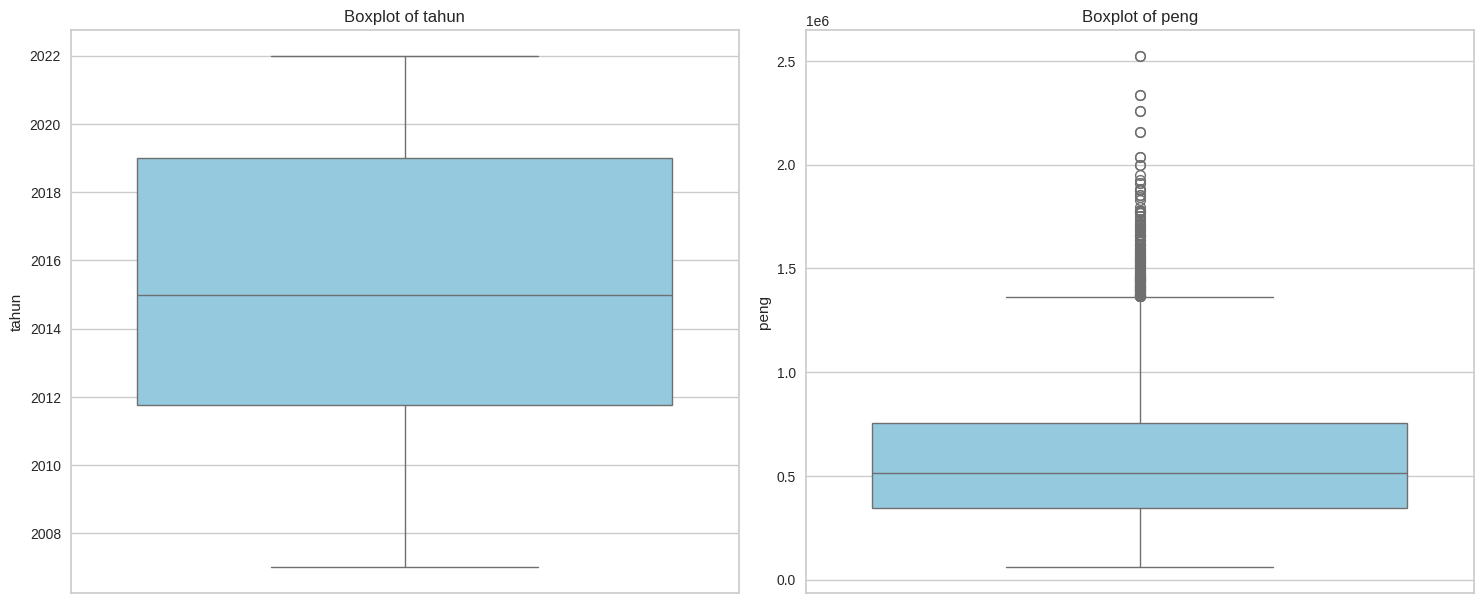

In [16]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [17]:
columns_to_check = df_cleaned.select_dtypes(include=['number']).columns

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_cleaned = remove_outliers(df_cleaned, columns_to_check)

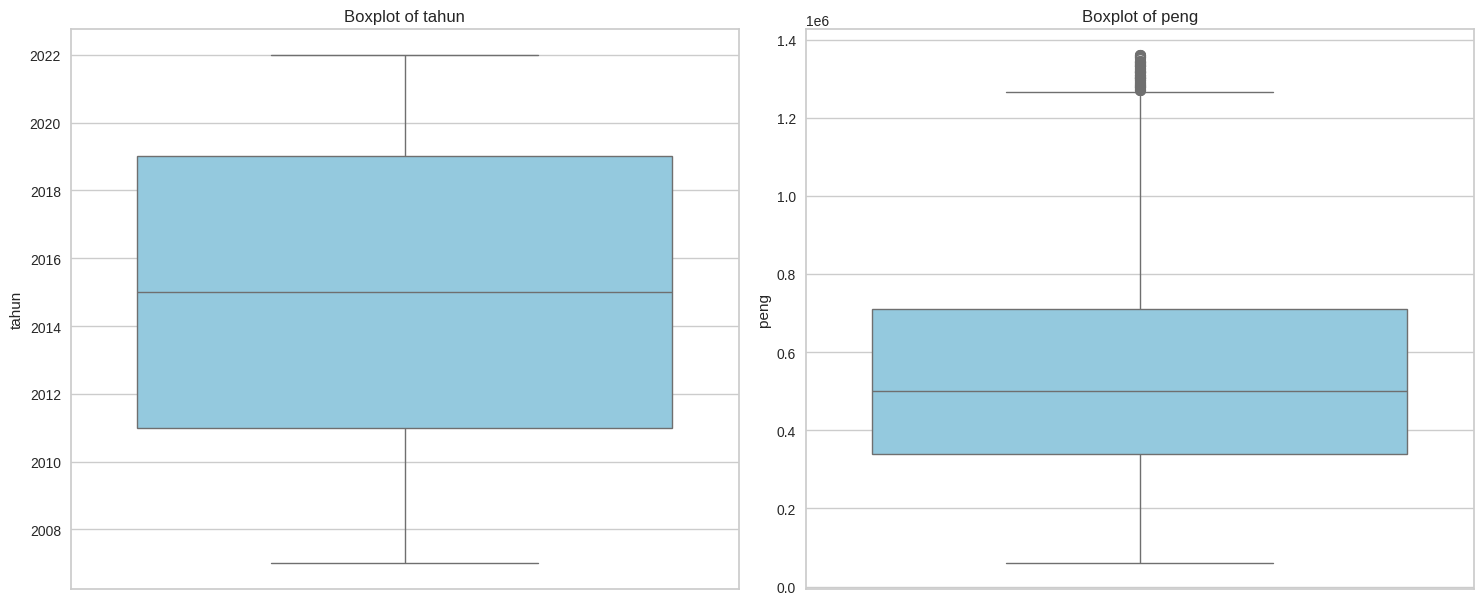

In [18]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Encoding Data Kategorikal

In [19]:
le_provinsi = LabelEncoder()
le_daerah = LabelEncoder()
le_jenis = LabelEncoder()

df_cleaned['provinsi'] = le_provinsi.fit_transform(df_cleaned['provinsi'])
df_cleaned['daerah'] = le_daerah.fit_transform(df_cleaned['daerah'])
df_cleaned['jenis'] = le_jenis.fit_transform(df_cleaned['jenis'])

df_cleaned

,provinsi,daerah,jenis,tahun,peng
0,0,0,0,2007,195176.0
1,0,0,0,2008,218781.0
2,0,0,0,2009,247427.0
3,0,0,0,2010,275749.0
4,0,0,0,2011,308000.0
...,...,...,...,...,...
4615,7,1,2,2018,1124716.0
4616,7,1,2,2019,1165240.0
4617,7,1,2,2020,1225684.0
4618,7,1,2,2021,1264589.0


## Standarisasi Fitur

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['tahun', 'peng']] = scaler.fit_transform(df_cleaned[['tahun', 'peng']])

In [21]:
df_cleaned

,provinsi,daerah,jenis,tahun,peng
0,0,0,0,-1.790100,-1.264194
1,0,0,0,-1.561685,-1.180569
2,0,0,0,-1.333271,-1.079085
3,0,0,0,-1.104856,-0.978748
4,0,0,0,-0.876442,-0.864492
...,...,...,...,...,...
4615,7,1,2,0.722460,2.028889
4616,7,1,2,0.950874,2.172453
4617,7,1,2,1.179289,2.386588
4618,7,1,2,1.407703,2.524417


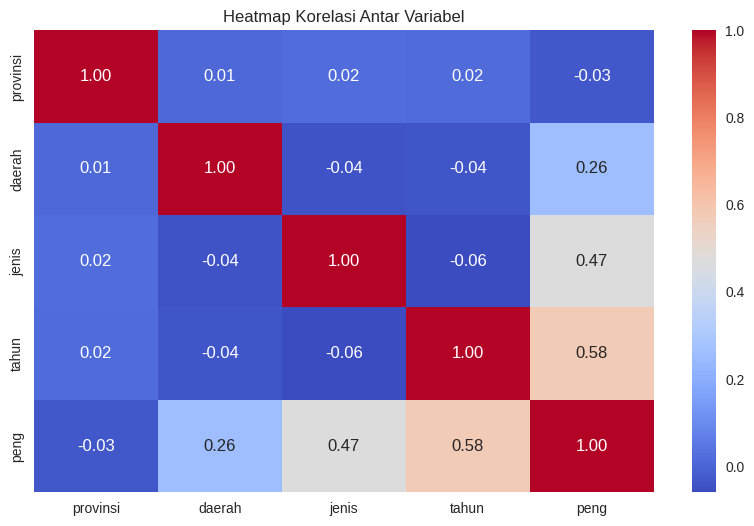

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
X = df_cleaned.iloc[:, [3, 4]].values

print(pd.DataFrame(X, columns=['tahun', 'Pengeluaran']))

         tahun  Pengeluaran
0    -1.790100    -1.264194
1    -1.561685    -1.180569
2    -1.333271    -1.079085
3    -1.104856    -0.978748
4    -0.876442    -0.864492
...        ...          ...
4414  0.722460     2.028889
4415  0.950874     2.172453
4416  1.179289     2.386588
4417  1.407703     2.524417
4418  1.636118     2.748291

[4419 rows x 2 columns]


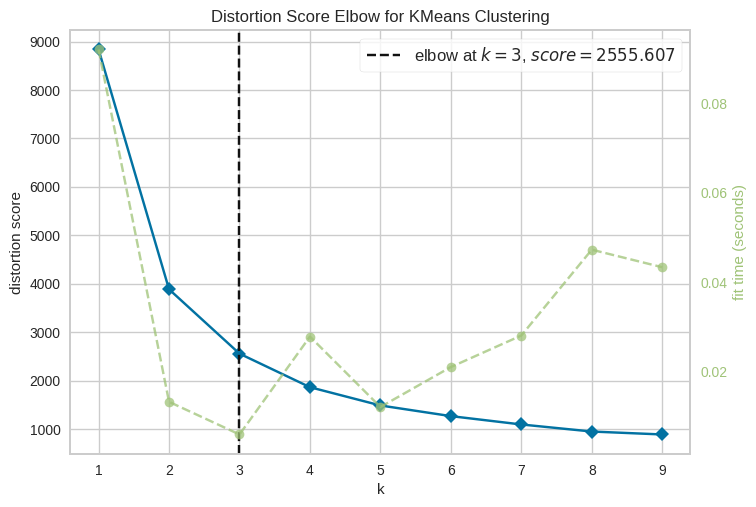

In [24]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans_optimal.fit_predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.43547351776444576


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

print(f"Jumlah fitur sebelum feature selection: {X.shape[1]}")
print(f"Jumlah fitur setelah feature selection: {X_selected.shape[1]}")

Jumlah fitur sebelum feature selection: 2
Jumlah fitur setelah feature selection: 2


In [27]:
# Model sebelum Feature Selection
kmeans_before = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_before = kmeans_before.fit_predict(X)

silhouette_before = silhouette_score(X, labels_before)
print(f"Silhouette Score sebelum Feature Selection: {silhouette_before}")

Silhouette Score sebelum Feature Selection: 0.43547351776444576


In [28]:
# Model setelah Feature Selection
kmeans_after = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_after = kmeans_after.fit_predict(X_selected)

silhouette_after = silhouette_score(X_selected, labels_after)
print(f"Silhouette Score setelah Feature Selection: {silhouette_after}")

Silhouette Score setelah Feature Selection: 0.43547351776444576


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

k = 3

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_jenis = cluster_data[:, 0].mean()
        mean_pengeluaran = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Jenis: {mean_jenis:.0f}")
        print(f"Rata-rata Pengeluaran: {mean_pengeluaran:.2f}")

analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Jenis: 1
Rata-rata Pengeluaran: 0.02

Cluster 2:
Rata-rata Jenis: -1
Rata-rata Pengeluaran: -0.74

Cluster 3:
Rata-rata Jenis: 1
Rata-rata Pengeluaran: 1.63


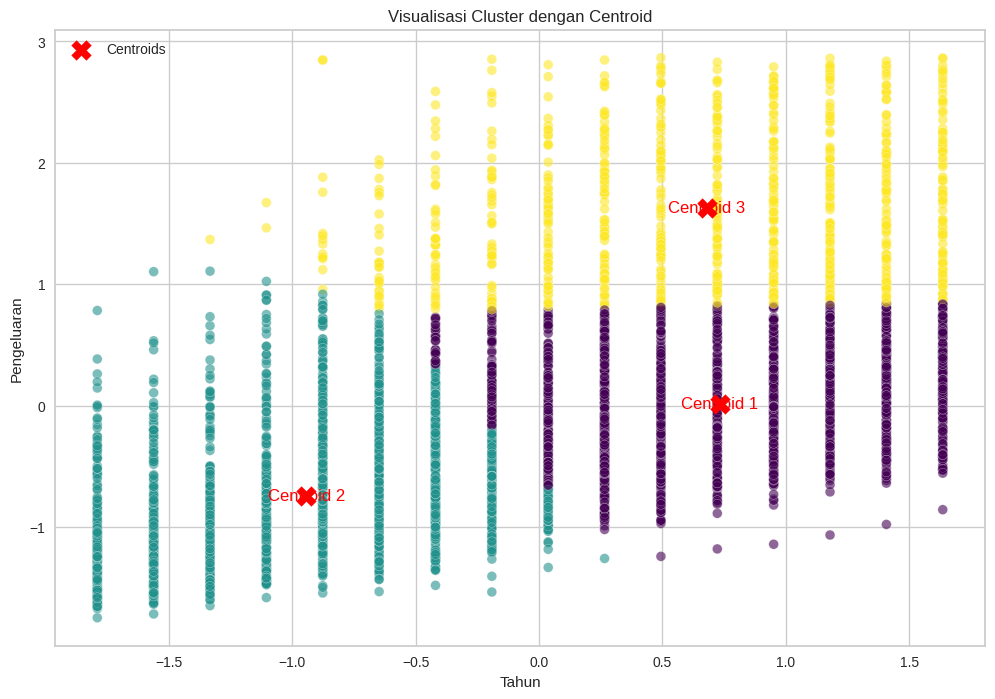

Nilai Centroids:
Centroid 1: Tahun = 0.73, Pengeluaran = 0.01
Centroid 2: Tahun = -0.94, Pengeluaran = -0.74
Centroid 3: Tahun = 0.68, Pengeluaran = 1.63


In [30]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Tahun')
plt.ylabel('Pengeluaran')
plt.legend()

plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Tahun = {centroid[0]:.2f}, Pengeluaran = {centroid[1]:.2f}")

In [31]:
df_cleaned

,provinsi,daerah,jenis,tahun,peng
0,0,0,0,-1.790100,-1.264194
1,0,0,0,-1.561685,-1.180569
2,0,0,0,-1.333271,-1.079085
3,0,0,0,-1.104856,-0.978748
4,0,0,0,-0.876442,-0.864492
...,...,...,...,...,...
4615,7,1,2,0.722460,2.028889
4616,7,1,2,0.950874,2.172453
4617,7,1,2,1.179289,2.386588
4618,7,1,2,1.407703,2.524417


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
df_original = df_cleaned.copy()

In [33]:
df_original['provinsi'] = le_provinsi.inverse_transform(df_original['provinsi'])
df_original['daerah'] = le_daerah.inverse_transform(df_original['daerah'])
df_original['jenis'] = le_jenis.inverse_transform(df_original['jenis'])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [34]:
df_original[['tahun', 'peng']] = scaler.inverse_transform(df_original[['tahun', 'peng']])

In [35]:
df_original

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007.0,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008.0,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009.0,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010.0,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011.0,308000.0
...,...,...,...,...,...
4615,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2018.0,1124716.0
4616,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2019.0,1165240.0
4617,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2020.0,1225684.0
4618,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2021.0,1264589.0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [36]:
df_cleaned['Cluster'] = kmeans.labels_
df_cleaned = df_cleaned.drop(columns=['provinsi', 'daerah', 'jenis'])

print(df_cleaned.groupby('Cluster').agg(['mean', 'std', 'min', 'max']))

            tahun                                    peng                      \
             mean       std       min       max      mean       std       min   
Cluster                                                                         
0        0.729696  0.563204 -0.419613  1.636118  0.015959  0.435684 -1.240756   
1       -0.944846  0.520754 -1.790100  0.265631 -0.741806  0.518059 -1.745860   
2        0.678991  0.685125 -1.333271  1.636118  1.634435  0.581796  0.793605   

                   
              max  
Cluster            
0        0.841659  
1        1.108165  
2        2.865951  


In [37]:
numeric_summary = df_cleaned.groupby("Cluster")[['tahun', 'peng']].mean().reset_index()
numeric_summary[['tahun', 'peng']] = scaler.inverse_transform(numeric_summary[['tahun', 'peng']])
numeric_summary['tahun'] = numeric_summary['tahun'].astype(int)
numeric_summary['peng'] = numeric_summary['peng'].apply(lambda x: f"{x:,.2f}")
numeric_summary

,Cluster,tahun,peng
0,0,2018,"556,525.31"
1,1,2010,"342,630.89"
2,2,2017,"1,013,373.28"


In [38]:
df_cleaned[['tahun', 'peng']] = scaler.inverse_transform(df_cleaned[['tahun', 'peng']])
df_cleaned['tahun'] = df_cleaned['tahun'].astype(int)
df_cleaned['peng'] = df_cleaned['peng'].astype(int)

In [39]:
df_cleaned.sort_values(by='Cluster')

,tahun,peng,Cluster
14,2021,597940,0
13,2020,566947,0
12,2019,520759,0
11,2018,506656,0
10,2017,494150,0
...,...,...,...
4614,2017,1036497,2
4618,2021,1264589,2
4619,2022,1327782,2
4615,2018,1124716,2


Tulis hasil interpretasinya di sini.
1. Cluster 0: Pengeluaran Sedang
2. Cluster 1: Pengeluaran Rendah
3. Cluster 2: Pengeluaran Tinggi

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Tahun:** 2018  
- **Rata-rata Pengeluaran:** Rp556,525.31  
- **Analisis:** Cluster ini terdiri dari pengeluaran dalam rata-rata tahun. Hal ini menunjukkan bahwa pengeluaran pada rata-rata tahun 2018 sebesar Rp556,525 perkapita.

## Cluster 1:
- **Rata-rata Tahun:** 2010  
- **Rata-rata Pengeluaran:** Rp342,630.89  
- **Analisis:** Cluster ini terdiri dari pengeluaran dalam rata-rata tahun di mana jumlahnya lebih kecl dari rata-rata tahun 2018. Hal ini menunjukkan bahwa pengeluaran pada rata-rata tahun 2010 sebesar Rp342,630 perkapita.

## Cluster 2:
- **Rata-rata Tahun:** 2017  
- **Rata-rata Pengeluaran:** Rp1,013,373.28  
- **Analisis:** Clustering yang terakhir ini terdiri dari pengeluaran dalam rata-rata tahun 2017. Terlihat pada rata-rata tahun, sebelum 2018, pengeluara perkapitanya lebih banyak dibandingkan 2018, yaitu sebesar Rp1,013,373


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df_cleaned.to_csv('hasil_clustering.csv', index=False)